# Módulo 1: Análisis de datos en el ecosistema Python

### Sesión (18)

**30/01/2023**

## Aplicar un caso de uso (*Clasificación*)

In [2]:
# importamos las librerías necesarias 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
# Modificamos los parámetros de los gráficos en matplotlib
from matplotlib.pyplot import rcParams

rcParams['figure.figsize'] = 12, 6 # el primer dígito es el ancho y el segundo el alto
rcParams["font.weight"] = "bold"
rcParams["font.size"] = 10
rcParams["axes.labelweight"] = "bold"

### Dataset de cubierta forestal

**[Forest Covertype data](https://archive.ics.uci.edu/ml/datasets/Covertype)** es un conjunto de datos cargado en la librería _sklearn_ que permite realizar un ejercicio tipo problemas de **clasificación**. El objetivo de este dataset es **estudiar las variables cartográficas** para poder **predecir el tipo de cubierta forestal**. El tipo real de cubierta forestal para una observación (celda de 30 x 30 metros) se ha determinado a partir de los datos del **Servicio Forestal de EE.UU. (USFS)**. 

Los datos están en forma **cruda** (sin escalar) y contienen columnas binarias (0 o 1) de datos para variables independientes cualitativas (áreas silvestres y tipos de suelo).

Estas áreas de estudio representan **bosques con mínimas perturbaciones causadas por el hombre**, por lo que los tipos de cubierta forestal existentes son más el **resultado de procesos ecológicos**, que de prácticas de gestión forestal.

### Análisis Exploratorio Inicial, Tratamiento y Limpieza de datos

In [4]:
from sklearn.datasets import fetch_covtype

# Construimos un dataframe con los datos medidos de la cubierta forestal
dataset_cub = pd.DataFrame(fetch_covtype()["data"], columns=fetch_covtype()["feature_names"])

# Añadimos la variable objetivo
dataset_cub['target'] = fetch_covtype()["target"]

dataset_cub

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,target
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396.0,153.0,20.0,85.0,17.0,108.0,240.0,237.0,118.0,837.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
581008,2391.0,152.0,19.0,67.0,12.0,95.0,240.0,237.0,119.0,845.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
581009,2386.0,159.0,17.0,60.0,7.0,90.0,236.0,241.0,130.0,854.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
581010,2384.0,170.0,15.0,60.0,5.0,90.0,230.0,245.0,143.0,864.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


Vamos a sacar un dataset mucho más pequeño para **simplificar los cálculos** y **reducir el tiempo de computación** de los algoritmos. Una primera idea para extraer un subconjunto podría ser quedarnos por ejemplo con los **_100.000_ primeros registros** de la tabla.

In [5]:
dataset_cub[0:100000]

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,target
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3100.0,52.0,16.0,376.0,50.0,3816.0,227.0,203.0,105.0,4295.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
99996,3090.0,50.0,16.0,361.0,40.0,3840.0,225.0,202.0,106.0,4268.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
99997,3083.0,45.0,18.0,335.0,33.0,3864.0,222.0,198.0,104.0,4241.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
99998,3077.0,41.0,15.0,309.0,43.0,3889.0,221.0,205.0,116.0,4214.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


El posible peligro de este enfoque es que **no obtengamos un subconjunto muy representativo**. Realizamos una consulta sobre una de las variables del datset para ver si estadísticamente tienen las mismas características o no. 

In [6]:
dataset_cub['Elevation'].describe()[['count', 'mean', 'std']]

count    581012.000000
mean       2959.365301
std         279.984734
Name: Elevation, dtype: float64

In [7]:
dataset_cub[0:100000]['Elevation'].describe()[['count', 'mean', 'std']]

count    100000.000000
mean       2862.036680
std         231.376584
Name: Elevation, dtype: float64

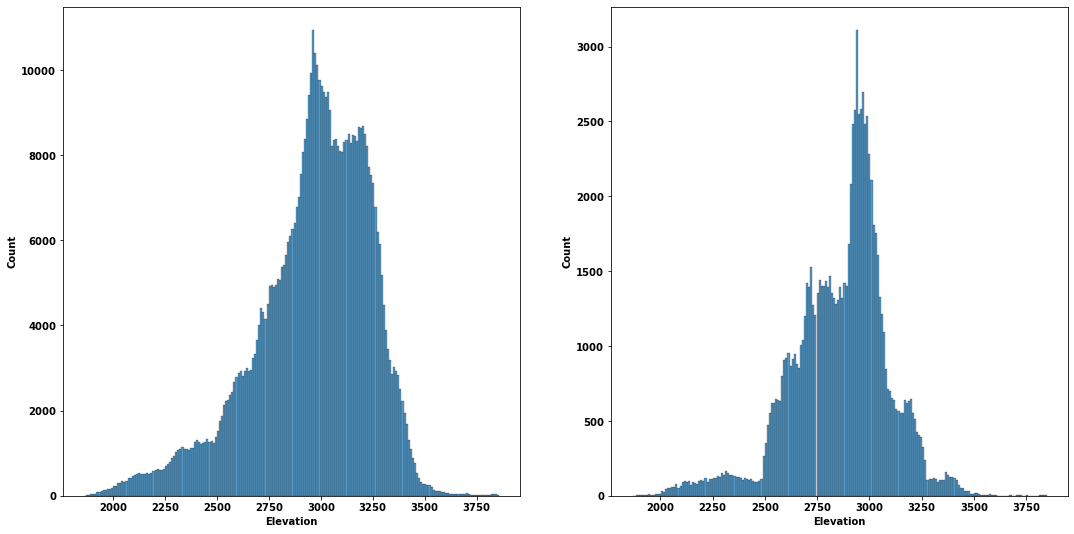

In [8]:
# Comparar la distribución de la variable "Elevation" entre los dos Dataframes
fig, axes = plt.subplots(1, 2, figsize=(18,9))
sns.histplot(dataset_cub['Elevation'], bins=200, ax=axes[0])
sns.histplot(dataset_cub[0:100000]['Elevation'], bins=200, ax=axes[1])
plt.show()

Se puede observar que la variable analizada no tiene la misma representación en el subconjunto de los _100.000_ primeros registros del dataset. Otra opción para conseguir un trozo de los datos originales, sería aplicar la técnica de **remuestro aleatorio (_random resampling_)**.

Vamos a hacer un remuestreo aleatorio para **quedarnos aproximadamente con el 17% de los datos** usando el método **[sample](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html)** sobre los _DataFrames_ de la librería _pandas_:

In [9]:
100/6

16.666666666666668

In [10]:
df_cub = dataset_cub.sample(frac=1/5.81012, random_state=222).reset_index(drop=True)
df_cub

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,target
0,3311.0,3.0,13.0,551.0,106.0,2780.0,202.0,215.0,149.0,2220.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7
1,2429.0,70.0,29.0,95.0,18.0,1589.0,237.0,169.0,43.0,391.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
2,2324.0,315.0,14.0,124.0,43.0,391.0,182.0,228.0,185.0,560.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
3,2959.0,346.0,10.0,90.0,20.0,5876.0,200.0,223.0,162.0,3979.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,2910.0,62.0,15.0,330.0,97.0,3246.0,231.0,208.0,106.0,2275.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2908.0,59.0,15.0,633.0,271.0,1036.0,230.0,208.0,107.0,577.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
99996,2379.0,292.0,21.0,95.0,37.0,1321.0,155.0,230.0,213.0,330.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
99997,2786.0,147.0,7.0,42.0,7.0,2162.0,229.0,239.0,143.0,1574.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
99998,2863.0,36.0,10.0,514.0,26.0,2746.0,219.0,217.0,132.0,3550.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [11]:
# Consultamos las principales esdadísticas de la variable analizada anteriormente
df_cub['Elevation'].describe()[['count', 'mean', 'std']]

count    100000.000000
mean       2959.010060
std         279.864034
Name: Elevation, dtype: float64

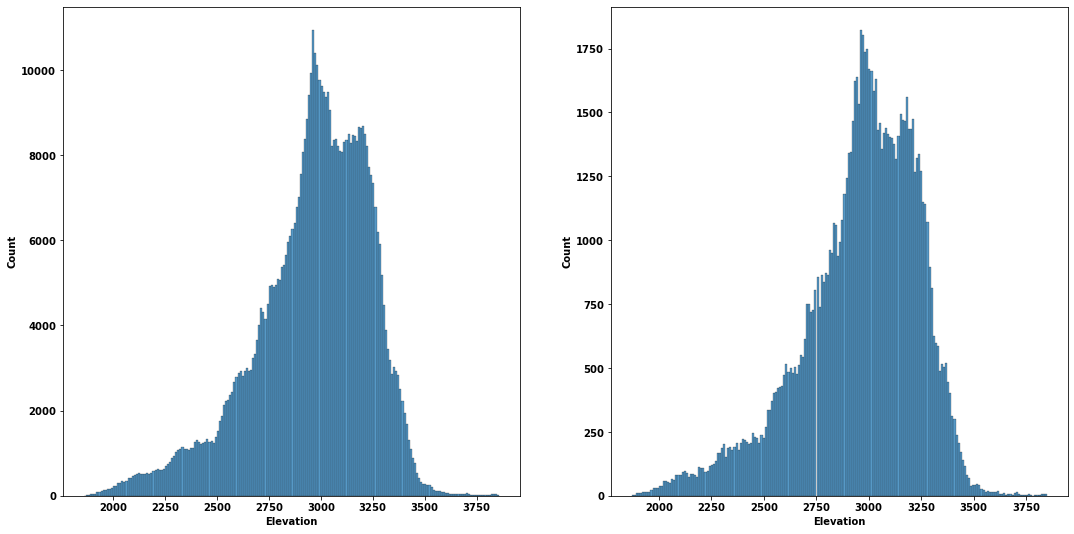

In [12]:
# Comparar la distribución de la variable "Elevation" entre el DataFrame original y el subconjunto obtenido mediante el remuestreo aleatorio
fig, axes = plt.subplots(1, 2, figsize=(18,9))
sns.histplot(dataset_cub['Elevation'], bins=200, ax=axes[0])
sns.histplot(df_cub['Elevation'], bins=200, ax=axes[1])
plt.show()

Podemos ver que este último subconjunto, a pesar de tener solamente 17% de los datos, **sí que incluye un set de observaciones muy representativas** respecto al dataset original. 

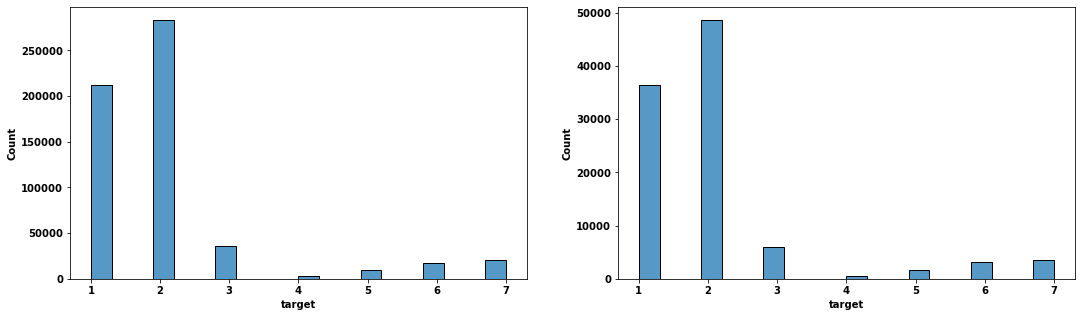

In [13]:
# Comparar la distribución de la variable objetivo entre los dos Dataframes
fig, axes = plt.subplots(1, 2, figsize=(18,5))
sns.histplot(dataset_cub['target'], bins=20, ax=axes[0])
sns.histplot(df_cub['target'], bins=20, ax=axes[1])
plt.show()

In [14]:
df_cub.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,target
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000
mean,2959.010060,155.927130,14.078440,268.415310,45.890660,2356.444880,212.226180,223.392060,142.541110,1984.702670,...,0.091120,0.078660,0.003050,0.003510,0.000190,0.000510,0.026360,0.023650,0.014600,2.05919
std,279.864034,111.880189,7.466349,212.389266,57.923415,1559.881883,26.567206,19.768911,38.116316,1328.355754,...,0.287781,0.269209,0.055143,0.059141,0.013783,0.022578,0.160204,0.151957,0.119946,1.40864
min,1871.000000,0.000000,0.000000,0.000000,-164.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000
25%,2810.000000,59.000000,9.000000,108.000000,7.000000,1110.000000,198.000000,213.000000,119.000000,1022.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000
50%,2995.000000,127.000000,13.000000,218.000000,29.000000,2005.000000,218.000000,226.000000,143.000000,1712.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.00000
75%,3163.000000,261.000000,18.000000,384.000000,68.000000,3336.000000,231.000000,237.000000,168.000000,2553.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.00000
max,3849.000000,360.000000,66.000000,1390.000000,592.000000,7117.000000,254.000000,254.000000,253.000000,7168.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.00000


In [15]:
df_cub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Elevation                           100000 non-null  float64
 1   Aspect                              100000 non-null  float64
 2   Slope                               100000 non-null  float64
 3   Horizontal_Distance_To_Hydrology    100000 non-null  float64
 4   Vertical_Distance_To_Hydrology      100000 non-null  float64
 5   Horizontal_Distance_To_Roadways     100000 non-null  float64
 6   Hillshade_9am                       100000 non-null  float64
 7   Hillshade_Noon                      100000 non-null  float64
 8   Hillshade_3pm                       100000 non-null  float64
 9   Horizontal_Distance_To_Fire_Points  100000 non-null  float64
 10  Wilderness_Area_0                   100000 non-null  float64
 11  Wilderness_Area_1          

In [16]:
# Conteo de valores perdidos/faltantes  
df_cub.isna().sum().sum()

0

In [17]:
# Consultamos los registros que tienen algún valor nulo
df_cub.drop(df_cub.dropna().index)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,target


### Reducción de Variables (___Dimensionality Reduction___)

### **`Ejercicio 18.1`**

Para conseguir un dataset con una dimensión reducidad, aplica la técnica de **Selección de variables basada en árbol de decisión** mediante las importancias de cada variable (**`Decision Trees Importances`**):

- Filtra el tablón para quedarnos solamente con **las variables que aglutinan hasta el `95%` de la información** que se requiere para estimar la variable objetivo.
- `random_state=100`

In [18]:
#18.1
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.datasets import load_iris

# Cargar los datos de ejemplo

X = df_cub.drop('target',axis=1)
y = df_cub['target']

# Entrenar el árbol de decisión
clf = DecisionTreeClassifier(random_state=100)
clf.fit(X, y)

# Seleccionar las variables importantes
sfm = SelectFromModel(clf, threshold='0.95*median')
X_new = sfm.fit_transform(X, y)

# Recuperar las características seleccionadas y la variable objetivo
selected_features = X.columns[sfm.get_support()]
data_new = df_cub[selected_features.tolist() + ['target']]

# Imprimir las características seleccionadas y el nuevo conjunto de datos
print(selected_features.tolist())
print(df_cub.shape)
print(data_new.shape)

['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area_0', 'Wilderness_Area_1', 'Wilderness_Area_2', 'Soil_Type_1', 'Soil_Type_3', 'Soil_Type_9', 'Soil_Type_12', 'Soil_Type_19', 'Soil_Type_21', 'Soil_Type_22', 'Soil_Type_23', 'Soil_Type_28', 'Soil_Type_29', 'Soil_Type_30', 'Soil_Type_31', 'Soil_Type_32', 'Soil_Type_38']
(100000, 55)
(100000, 28)


In [19]:
data_new

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_38,target
0,3311.0,3.0,13.0,551.0,106.0,2780.0,202.0,215.0,149.0,2220.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
1,2429.0,70.0,29.0,95.0,18.0,1589.0,237.0,169.0,43.0,391.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
2,2324.0,315.0,14.0,124.0,43.0,391.0,182.0,228.0,185.0,560.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
3,2959.0,346.0,10.0,90.0,20.0,5876.0,200.0,223.0,162.0,3979.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,2910.0,62.0,15.0,330.0,97.0,3246.0,231.0,208.0,106.0,2275.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2908.0,59.0,15.0,633.0,271.0,1036.0,230.0,208.0,107.0,577.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2
99996,2379.0,292.0,21.0,95.0,37.0,1321.0,155.0,230.0,213.0,330.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
99997,2786.0,147.0,7.0,42.0,7.0,2162.0,229.0,239.0,143.0,1574.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
99998,2863.0,36.0,10.0,514.0,26.0,2746.0,219.0,217.0,132.0,3550.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


---

### **`Ejercicio 18.2`**

Después de filtrar el dataset vamos a plantear un **problema de clasificación** para conseguir un **clasificador de la cubierta forestal** en basea a las **variables cartográficas**.:  

**`18.2.1`** Genera una gráfica para visualizar la distribución de las variables del datset en conjunto. Analiza dicha gráfica y explica si hay una necesidad de normalizar los datos.  

**`18.2.2`** Normaliza todas las variables del dataset a una escala estándar. Para ello puedes realizar estas transformaciones:

- LLevar las variables de entrada a una escala de `0` a `1`
- Convertir la variable objetivo en valores numéricos **entre 0 y el número de clases menos 1**

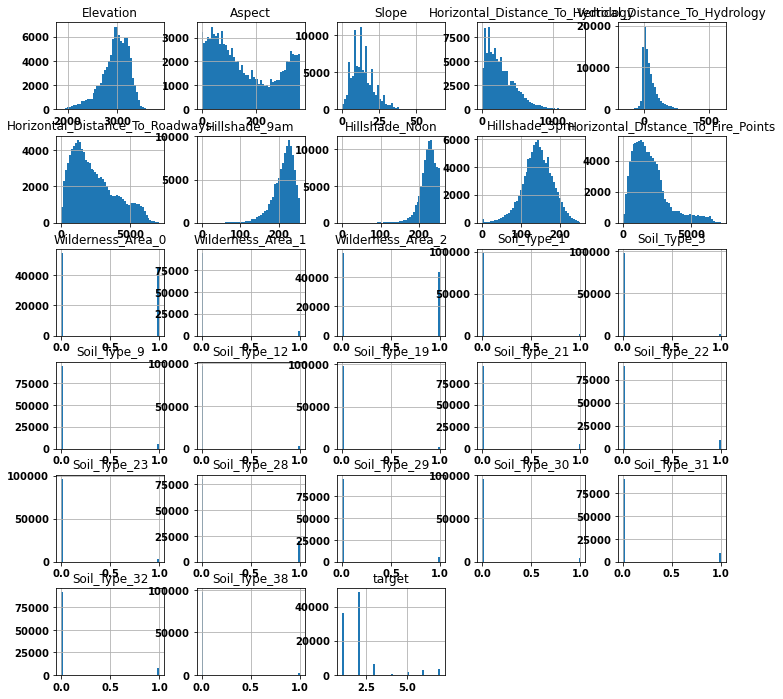

In [20]:
#18.2.1
data_new.hist(figsize=(12,12), bins=50)
plt.show()

In [23]:
#18.2.2
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Obtener las variables de entrada y la variable objetivo
X = data_new.drop('target', axis=1)
y = data_new['target']

# Normalizar las variables de entrada a una escala de 0 a 1
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Convertir la variable objetivo en valores numéricos entre 0 y el número de clases menos 1
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Crear un nuevo DataFrame con las variables de entrada normalizadas y la variable objetivo codificada
data_normalized = pd.DataFrame(X_scaled, columns=X.columns)
data_normalized['target'] = y_encoded
data_normalized

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_38,target
0,0.728008,0.008333,0.196970,0.396403,0.357143,0.390614,0.795276,0.846457,0.588933,0.309710,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
1,0.282103,0.194444,0.439394,0.068345,0.240741,0.223268,0.933071,0.665354,0.169960,0.054548,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,0.229019,0.875000,0.212121,0.089209,0.273810,0.054939,0.716535,0.897638,0.731225,0.078125,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,0.550051,0.961111,0.151515,0.064748,0.243386,0.825629,0.787402,0.877953,0.640316,0.555106,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.525278,0.172222,0.227273,0.237410,0.345238,0.456091,0.909449,0.818898,0.418972,0.317383,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.524267,0.163889,0.227273,0.455396,0.575397,0.145567,0.905512,0.818898,0.422925,0.080497,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
99996,0.256825,0.811111,0.318182,0.068345,0.265873,0.185612,0.610236,0.905512,0.841897,0.046038,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
99997,0.462588,0.408333,0.106061,0.030216,0.226190,0.303780,0.901575,0.940945,0.565217,0.219587,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
99998,0.501517,0.100000,0.151515,0.369784,0.251323,0.385837,0.862205,0.854331,0.521739,0.495257,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


---

### **`Ejercicio 18.3`**

Después de estandarizar los datos procedemos a crear el **primer clasificador**:  

**`18.3.1`** Divide el datset en _training_ y en _test_:
- Guarda el `20%` de los datos para testeo.
- `random_state=100`  

**`18.3.2`** Entrena un modelo de **regresión logística**:
- Número máximo de iteraciones igual a `1000`
- `random_state=100`

**`18.3.3`** Calcula diferentes métricas para evaluar este modelo y analiza su rendimiendo.
- Accuracy
- F1-score `(average='weighted')`
- Classification report `(zero_division=0)`
- Confusion matrix

In [24]:
#18.3.1
from sklearn.model_selection import train_test_split

# Dividir el dataset en training y test
X = data_normalized.drop('target', axis=1)
y = data_normalized['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [26]:
#18.3.2
from sklearn.linear_model import LogisticRegression

# Crear el modelo de regresión logística
model = LogisticRegression(max_iter=1000, random_state=100)

# Entrenar el modelo con los datos de training
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [28]:
#18.3.3
from sklearn.metrics import accuracy_score

# Calcular el accuracy del modelo en el dataset de test
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.71615

In [29]:
from sklearn.metrics import f1_score

# Calcular el f1-score del modelo en el dataset de test
f1 = f1_score(y_test, y_pred, average='weighted')
f1

0.7031404672446984

In [32]:
from sklearn.metrics import classification_report

# Generar el classification report del modelo en el dataset de test
report = classification_report(y_test, y_pred, zero_division=0)
report

'              precision    recall  f1-score   support\n\n           0       0.72      0.69      0.70      7381\n           1       0.74      0.80      0.77      9615\n           2       0.63      0.82      0.71      1236\n           3       0.60      0.13      0.22       114\n           4       0.00      0.00      0.00       349\n           5       0.40      0.17      0.24       616\n           6       0.71      0.55      0.62       689\n\n    accuracy                           0.72     20000\n   macro avg       0.54      0.45      0.47     20000\nweighted avg       0.70      0.72      0.70     20000\n'

In [33]:
from sklearn.metrics import confusion_matrix

# Generar la matriz de confusión del modelo en el dataset de test
confusion = confusion_matrix(y_test, y_pred)
confusion

array([[5109, 2121,    2,    0,    0,    0,  149],
       [1710, 7706,  153,    1,    0,   38,    7],
       [   0,  124, 1008,    7,    0,   97,    0],
       [   0,    0,   78,   15,    0,   21,    0],
       [   0,  335,   11,    0,    0,    3,    0],
       [   0,  157,  351,    2,    0,  106,    0],
       [ 307,    3,    0,    0,    0,    0,  379]])

---

### **`Ejercicio 18.4`**

Ahora probamos la creación de otros modelo basados en **árboles de decisión**:  

**`18.4.1`** Entrena un modelo tipo **Decision Tree Classifire** y calcula las métricas correspondientes para analizar su rendimiento en comparación con el modelo anterior:
- `random_state=100`
- Accuracy
- F1-score `(average='weighted')`
- Classification report `(zero_division=0)`

**`18.4.2`** Saca la curva de complejidad del modelo _Decision Tree_ (**Model Complexity Curve**) y crea un nuevo clasificador **con el valor óptimo de la profundidad del árbol** según esta gráfica. Después saca las métricas correspondiente y analiza el rendimiento del modelo en comparación de los anteriores.
- `random_state=100`
- rango de profundidades:  de `2` a `30` __inclusive__

**`18.4.3`** Saca la gráfica de el *Learning Curve* para estos modelos, definiendo y aplicando una función que toma el valor del hiperparámetro como su entrada y dibuja la evolución del rendimiento del modelo para el conjunto de training y de test. Explica si este último modelo tiene preferencia o no, comparando con modelos anteriores.
- `random_state=100`
- (*Sugerencia*: No incluya más de 10 puntos en el eje horizontal y empieza la gráfica con un mínimo de _1000_ muestras para el modelo)

In [34]:
#18.4.1
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

# Crear modelo
dt = DecisionTreeClassifier(random_state=100)

# Entrenar modelo
dt.fit(X_train, y_train)

# Predecir etiquetas para datos de test
y_pred = dt.predict(X_test)

# Calcular métricas
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
report = classification_report(y_test, y_pred, zero_division=0)
cm = confusion_matrix(y_test, y_pred)

# Mostrar resultados
print("Accuracy: {:.3f}".format(accuracy))
print("F1-score: {:.3f}".format(f1))
print("Classification Report:\n", report)
print("Confusion Matrix:\n", cm)

Accuracy: 0.858
F1-score: 0.858
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.85      0.86      7381
           1       0.88      0.88      0.88      9615
           2       0.83      0.84      0.84      1236
           3       0.73      0.70      0.71       114
           4       0.62      0.65      0.63       349
           5       0.73      0.72      0.72       616
           6       0.84      0.89      0.87       689

    accuracy                           0.86     20000
   macro avg       0.78      0.79      0.79     20000
weighted avg       0.86      0.86      0.86     20000

Confusion Matrix:
 [[6308  950    3    0   20    5   95]
 [ 899 8460   79    1  114   44   18]
 [   0   73 1036   22    3  102    0]
 [   0    0   24   80    0   10    0]
 [  14  102    3    0  226    4    0]
 [   7   58   98    7    2  444    0]
 [  70    7    0    0    0    0  612]]


In [35]:
#18.4.2
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

# definir los valores de profundidad a evaluar
depths = np.arange(2, 31)

# inicializar el clasificador
clf = DecisionTreeClassifier(random_state=100)

# definir el espacio de búsqueda de parámetros
param_grid = {'max_depth': depths}

# inicializar el objeto GridSearchCV
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
# ajustar el objeto GridSearchCV a los datos de entrenamiento
grid_search.fit(X_train_scaled, y_train)

# obtener la profundidad óptima del árbol
optimal_depth = grid_search.best_params_['max_depth']

# imprimir la profundidad óptima
print(f"Profundidad óptima: {optimal_depth}")

# crear un nuevo clasificador con la profundidad óptima
clf = DecisionTreeClassifier(max_depth=optimal_depth, random_state=100)

# entrenar el clasificador con los datos de entrenamiento
clf.fit(X_train_scaled, y_train)

# hacer predicciones con el clasificador entrenado
y_pred = clf.predict(X_test_scaled)

# calcular las métricas de evaluación
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
f1_weighted = f1_score(y_test, y_pred, average='weighted')
report = classification_report(y_test, y_pred, zero_division=0)
matrix = confusion_matrix(y_test, y_pred)

# imprimir las métricas de evaluación
print(f"Accuracy: {accuracy}")
print(f"F1-score (weighted): {f1_weighted}")
print("Classification report:")
print(report)
print("Confusion matrix:")
print(matrix)

Profundidad óptima: 23
Accuracy: 0.82355
F1-score (weighted): 0.823044055679146
Classification report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      7381
           1       0.85      0.85      0.85      9615
           2       0.78      0.82      0.80      1236
           3       0.74      0.58      0.65       114
           4       0.61      0.47      0.53       349
           5       0.64      0.68      0.66       616
           6       0.83      0.84      0.83       689

    accuracy                           0.82     20000
   macro avg       0.75      0.72      0.73     20000
weighted avg       0.82      0.82      0.82     20000

Confusion matrix:
[[6073 1179    5    0   16    5  103]
 [1169 8163  112    0   88   66   17]
 [   0   66 1009   16    1  144    0]
 [   0    3   30   66    0   15    0]
 [  17  155    9    0  165    3    0]
 [   7   54  128    7    1  419    0]
 [ 100   13    0    0    0    0  576]]


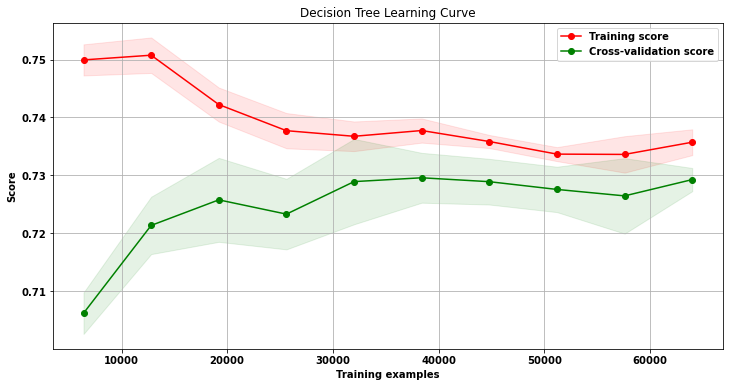

In [36]:
#18.4.3
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 10)):

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

from sklearn.tree import DecisionTreeClassifier

# Creamos el modelo con la profundidad óptima
dtc = DecisionTreeClassifier(max_depth=7, random_state=100)

# Graficamos la curva de aprendizaje
plot_learning_curve(dtc, "Decision Tree Learning Curve", X_train_scaled, y_train, cv=5)
plt.show()

---

### **`Ejercicio 18.5`**

Ahora probamos la creación de otros modelo basados en **bosques aleatorios**:  

**`18.5.1`** Entrena un modelo tipo **Random Forest Classifire** y calcula las métricas correspondientes para analizar su rendimiento en comparación con los modelos anteriores:
- `random_state=100`

**`18.5.2`** Consulta la profundidad de todos los árboles del bosque creado en el paso anterior y calcula la mediana de este parámetro.

**`18.5.3`** Saca las curvas de complejidad del modelo _Random Forest_ (**Model Complexity Curve**) y crea un nuevo clasificador **con los valores óptimos** analizados dentro de los rangos indicados para cada hiperparámeto. Después crea un modelo con estos parámetros "óptimos" y saca las métricas correspondientes para analizar el rendimiento del modelo en comparación con los anteriores.
- `random_state=100`
- define un rango con funciones de _numpy_ para considerar estos números de árboles: `[200, 250, 300, 350, 400]`  
- rango de profundidades:  de `20` a `40` __inclusive__ en pasos de 2 en 2.
- considera estas opciones para _max_features_ : `["auto", "log2", None]`
- Accuracy
- F1-score `(average='weighted')`
- Classification report `(zero_division=0)`
- **OOB** (out-of-bag score)

**`18.5.4`** Saca la gráfica del *Learning Curve* para estos modelos, definiendo y aplicando una función que toma el valor de los hiperparámetros analizados como su entrada y dibuja la evolución del rendimiento del modelo para el conjunto de training y de test. Explica si este último modelo tiene preferencia o no, comparando con modelos anteriores.
- `random_state=100`
- (*Sugerencia*: No incluya más de 10 puntos en el eje horizontal y empieza la gráfica con un mínimo de _1000_ muestras para el modelo)

In [37]:
#18.5.1
from sklearn.ensemble import RandomForestClassifier

# Crear un objeto Random Forest Classifier con los parámetros deseados
rfc = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=100)

# Entrenar el modelo con los datos de entrenamiento
rfc.fit(X_train, y_train)

# Predecir la variable objetivo para los datos de test
y_pred = rfc.predict(X_test)

# Calcular la accuracy del modelo
accuracy = rfc.score(X_test, y_test)
print("Accuracy: ", accuracy)

# Calcular el F1-score del modelo
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1-score: ", f1)

# Mostrar el classification report del modelo
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred, zero_division=0)
print(report)

# Mostrar la matriz de confusión del modelo
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Accuracy:  0.7624
F1-score:  0.7501051346716582
              precision    recall  f1-score   support

           0       0.76      0.75      0.75      7381
           1       0.77      0.85      0.81      9615
           2       0.70      0.86      0.77      1236
           3       0.81      0.30      0.44       114
           4       0.97      0.08      0.15       349
           5       0.70      0.22      0.34       616
           6       0.93      0.47      0.62       689

    accuracy                           0.76     20000
   macro avg       0.80      0.50      0.55     20000
weighted avg       0.77      0.76      0.75     20000

Confusion Matrix:
 [[5502 1855    1    0    0    0   23]
 [1348 8166   70    1    1   28    1]
 [   0  146 1057    6    0   27    0]
 [   0    0   76   34    0    4    0]
 [   2  310    8    0   29    0    0]
 [   0  172  306    1    0  137    0]
 [ 363    3    0    0    0    0  323]]


In [40]:
#18.5.2
tree_depths = [estimator.tree_.max_depth for estimator in rfc.estimators_]

# Calcular la mediana de las profundidades
median_depth = np.median(tree_depths)
print("La mediana de la profundidad de los árboles en el bosque es:", median_depth)

La mediana de la profundidad de los árboles en el bosque es: 10.0


In [41]:
#18.5.3
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, classification_report

# define los rangos para los valores de los hiperparámetros
n_estimators_range = np.arange(200, 401, 50)
max_depth_range = np.arange(20, 41, 2)
max_features_range = ['auto', 'log2', None]

# crea un diccionario que contiene todos los valores de los hiperparámetros para ser explorados en la búsqueda de la cuadrícula
param_grid = {'n_estimators': n_estimators_range,
              'max_depth': max_depth_range,
              'max_features': max_features_range}

# crea un modelo de bosque aleatorio
rf = RandomForestClassifier(random_state=100, oob_score=True)

# realiza la búsqueda de la cuadrícula
grid_rf = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_rf.fit(X_train_scaled, y_train)

# extrae los valores óptimos de los hiperparámetros
best_n_estimators = grid_rf.best_params_['n_estimators']
best_max_depth = grid_rf.best_params_['max_depth']
best_max_features = grid_rf.best_params_['max_features']

print('Valores óptimos de los hiperparámetros:')
print(f'n_estimators: {best_n_estimators}')
print(f'max_depth: {best_max_depth}')
print(f'max_features: {best_max_features}')
# ajustar el modelo con los hiperparámetros óptimos
rf_optimized = RandomForestClassifier(n_estimators=best_n_estimators, 
                                       max_depth=best_max_depth,
                                       max_features=best_max_features, 
                                       random_state=100,
                                       oob_score=True)
rf_optimized.fit(X_train_scaled, y_train)

# predecir el conjunto de entrenamiento y prueba
ytrain_pred = rf_optimized.predict(X_train_scaled)
ytest_pred = rf_optimized.predict(X_test_scaled)

# calcular las métricas de evaluación
accuracy = accuracy_score(y_test, ytest_pred)
f1_weighted = f1_score(y_test, ytest_pred, average='weighted')
report = classification_report(y_test, ytest_pred, zero_division=0)
oob_score = rf_optimized.oob_score_

# imprimir las métricas de evaluación
print('Métricas de evaluación del modelo Random Forest:')
print(f'Accuracy: {accuracy:.4f}')
print(f'F1-score (weighted): {f1_weighted:.4f}')
print(f'Classification report: {report}')
print(f'oob score: {oob_score}')




Fitting 5 folds for each of 165 candidates, totalling 825 fits


KeyboardInterrupt: 

In [42]:
#18.5.4
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 10)):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()
    plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")
    return plt
n_estimators = 400
max_depth = 34
max_features = "auto"
random_state = 100
rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, max_features=max_features, random_state=random_state)

title = f"Random Forest (n_estimators={n_estimators}, max_depth={max_depth}, max_features={max_features})"
plot_learning_curve(rf, title,  X_train_scaled, y_train)

rf.fit(X_train_scaled, y_train)

y_pred_rf = rf.predict(X_test_scaled)

print("Accuracy: ", accuracy_score(y_test, y_pred_rf))
print("F1-Score: ", f1_score(y_test, y_pred_rf, average="weighted"))
print(classification_report(y_test, y_pred_rf, zero_division=0))
print("OOB Score: ", rf.oob_score_)

KeyboardInterrupt: 

---

### **`Ejercicio 18.6`**

Ahora probamos la creación de otros modelo basados en **Gradient Boosting**:  

**`18.6.1`** Entrena un modelo tipo **XGBoost Classifire** y calcula las métricas correspondientes para analizar su rendimiento en comparación con los modelos anteriores:
- `random_state=100`

**`18.6.2`** Consulta el número y la profundidad máxima de los árboles del bosque creado en el paso anterior.

**`18.6.3`** Saca las curvas de complejidad del modelo _XGBClassifier_ (**Model Complexity Curve**) y crea un nuevo clasificador **con los valores óptimos** analizados dentro de los rangos indicados para cada hiperparámeto. Después crea un modelo con estos parámetros "óptimos" y saca las métricas correspondientes para analizar el rendimiento del modelo en comparación con los anteriores.
- `random_state=100`
- define un rango con funciones de _numpy_ para considerar estos números de árboles: `[100, 200, 300, 400, 500]`  
- rango de profundidades:  de `6` a `20` __inclusive__ en pasos de 2 en 2.
- valores a considerar para el *`learning_rate`*: `[0.01, 0.1, 0.3, 0.5]`
- Accuracy
- F1-score `(average='weighted')`
- Classification report `(zero_division=0)`

**`18.6.4`** Saca la gráfica del *Learning Curve* para estos modelos, definiendo y aplicando una función que toma el valor de los hiperparámetros analizados como su entrada y dibuja la evolución del rendimiento del modelo para el conjunto de training y de test. Explica si este último modelo tiene preferencia o no, comparando con modelos anteriores.
- `random_state=100`
- (*Sugerencia*: No incluya más de 10 puntos en el eje horizontal y empieza la gráfica con un mínimo de _1000_ muestras para el modelo)

In [43]:
#18.6.1
%pip install xgboost

from xgboost import XGBClassifier

# Definir el modelo
xgb = XGBClassifier(random_state=100)

# Entrenar el modelo
xgb.fit(X_train, y_train)

# Predecir las etiquetas para el conjunto de test
ypred = xgb.predict(X_test)

# Calcular las métricas correspondientes
acc = accuracy_score(y_test, ypred)
f1 = f1_score(y_test, ypred, average='weighted')
clf_report = classification_report(y_test, ypred, zero_division=0)
conf_matrix = confusion_matrix(y_test, ypred)

print("Accuracy:", acc)
print("F1-score (weighted):", f1)
print("Classification report:\n", clf_report)
print("Confusion matrix:\n", conf_matrix)

     |████████████████████████████████| 1.8 MB 5.5 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.
Accuracy: 0.85805
F1-score (weighted): 0.8569719375945555
Classification report:
               precision    recall  f1-score   support

           0       0.86      0.83      0.85      7381
           1       0.86      0.89      0.87      9615
           2       0.86      0.87      0.86      1236
           3       0.82      0.78      0.80       114
           4       0.83      0.52      0.64       349
           5       0.79      0.73      0.76       616
           6       0.91      0.89      0.90       689

    accuracy                           0.86     20000
   macro avg       0.85      0.79      0.81     20000
weighted avg       0.86      0.86      0.86     20000

Confusion matrix:
 [[6146 1171    0    0    3    3   58]
 [ 888 8604   47    2   32   36    6]
 [   0   75 1076   10    0   75    0]
 [   0    0   19   89    0    6    0]
 [   4  158    6

In [ ]:
#18.6.2, no se puede

In [46]:
#18.6.3
import numpy as np

n_estimators_range = [100, 200, 300, 400, 500]
max_depth_range = range(6, 21, 2)
learning_rate_range = [0.01, 0.1, 0.3, 0.5]
param_grid = {
    'n_estimators': n_estimators_range,
    'max_depth': max_depth_range,
    'learning_rate': learning_rate_range
}
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=100)

grid_search = GridSearchCV(xgb, param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train_scaled, y_train)
print("Best parameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)
xgb_opt = XGBClassifier(n_estimators=400, max_depth=6, learning_rate=0.1, random_state=100)
xgb_opt.fit(X_train_scaled, y_train)

y_pred_xgb_opt = xgb_opt.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred_xgb_opt))
print("F1-score:", f1_score(y_test, y_pred_xgb_opt, average='weighted'))
print("Classification report:")
print(classification_report(y_test, y_pred_xgb_opt, zero_division=0))

KeyboardInterrupt: 

---

KeyboardInterrupt: 

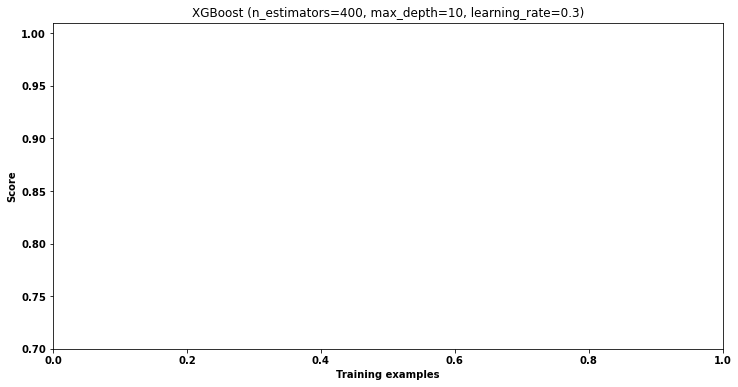

In [47]:
#18.6.4
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, train_sizes=np.linspace(.1, 1.0, 10)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=-1, train_sizes=train_sizes, scoring='accuracy')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")
    return plt

# Define los valores óptimos de los hiperparámetros
n_estimators = 400
max_depth = 10
learning_rate = 0.3
random_state = 100

# Crea un clasificador XGBClassifier con los valores óptimos
xgb = XGBClassifier(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate, random_state=random_state)

# Grafica la curva de aprendizaje
title = f"XGBoost (n_estimators={n_estimators}, max_depth={max_depth}, learning_rate={learning_rate})"
plot_learning_curve(xgb, title, X_train, y_train, ylim=(0.7, 1.01), cv=5, train_sizes=np.linspace(.1, 1.0, 10))
plt.show()

### **`Ejercicio 18.7`**

Ahora probamos la creación de otros modelo basados en **métodos Bayesianos**:  

**`18.7.1`** Entrena un modelo para cada tipo de algoritmos Bayesianos y calcula las métricas correspondientes para analizar sus rendimientos en comparación con los modelos anteriores:
- `GaussianNB`
- `MultinomialNB`
- `ComplementNB`
- `BernoulliNB`
- Accuracy
- F1-score `(average='weighted')`
- Classification report `(zero_division=0)`

**`18.7.2`** Saca la gráfica del *Learning Curve* para el modelo `GaussianNB` y explica si este modelo sufre de un posible "_Overfitting_" o "_Underfitting_" comparando con modelos anteriores.
- `random_state=100`
- (*Sugerencia*: No incluya más de 10 puntos en el eje horizontal y empieza la gráfica con un mínimo de _1000_ muestras para el modelo)

---

In [48]:
#18.7.1
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Crear los modelos
gnb = GaussianNB()
mnb = MultinomialNB()
cnb = ComplementNB()
bnb = BernoulliNB()

# Entrenar y predecir con los modelos
models = {'GaussianNB': gnb, 'MultinomialNB': mnb, 'ComplementNB': cnb, 'BernoulliNB': bnb}
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    report = classification_report(y_test, y_pred, zero_division=0)
    results[name] = {'accuracy': acc, 'f1-score': f1, 'classification_report': report}

<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

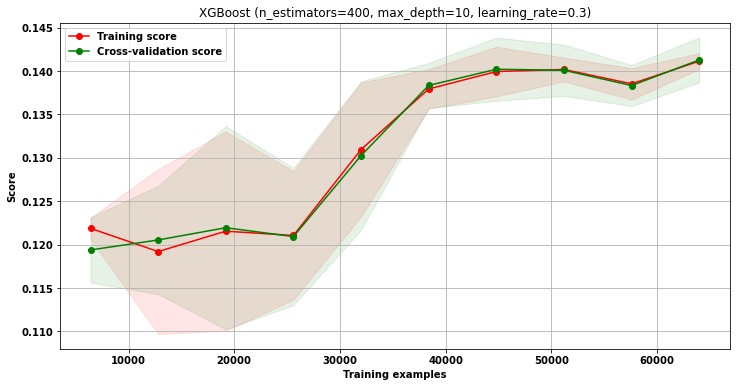

In [50]:
#18.7.2
plot_learning_curve(gnb, title, X_train, y_train, cv=5)

### **`Ejercicio 18.8`**

Ahora probamos la creación de otros modelo basados en **K vecinos más cercanos**:  

**`18.8.1`** Entrena un modelo tipo **K-Nearest Neighbors** con la configuración por defecto y otros dos modelos con `1` y `100` vecinos más cercanos. Calcula las métricas correspondientes para analizar sus rendimientos en comparación con el modelo anteriores:
- `random_state=100`
- Accuracy
- F1-score `(average='weighted')`
- Classification report `(zero_division=0)`

**`18.8.2`** Saca la gráfica del *Learning Curve* para estos modelos, definiendo y aplicando una función que toma el valor del hiperparámetro analizado como su entrada y dibuja la evolución del rendimiento del modelo para el conjunto de training y de test. Explica si este último modelo tiene preferencia o no, comparando con modelos anteriores.
- (*Sugerencia*: No incluya más de 5 puntos en el eje horizontal y empieza la gráfica con un mínimo de _1000_ muestras para el modelo)

In [51]:
#18.8.1
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
knn1 = KNeighborsClassifier(n_neighbors=5)
knn2 = KNeighborsClassifier(n_neighbors=6)
knn3 = KNeighborsClassifier(n_neighbors=100)
knn1.fit(X_train, y_train)
y_pred1 = knn1.predict(X_test)

knn2.fit(X_train, y_train)
y_pred2 = knn2.predict(X_test)

knn3.fit(X_train, y_train)
y_pred3 = knn3.predict(X_test)
acc1 = accuracy_score(y_test, y_pred1)
f1_1 = f1_score(y_test, y_pred1, average='weighted')
report1 = classification_report(y_test, y_pred1, zero_division=0)

acc2 = accuracy_score(y_test, y_pred2)
f1_2 = f1_score(y_test, y_pred2, average='weighted')
report2 = classification_report(y_test, y_pred2, zero_division=0)

acc3 = accuracy_score(y_test, y_pred3)
f1_3 = f1_score(y_test, y_pred3, average='weighted')
report3 = classification_report(y_test, y_pred3, zero_division=0)

In [52]:
report1

'              precision    recall  f1-score   support\n\n           0       0.89      0.86      0.87      7381\n           1       0.88      0.91      0.89      9615\n           2       0.81      0.85      0.83      1236\n           3       0.74      0.61      0.67       114\n           4       0.77      0.58      0.67       349\n           5       0.73      0.68      0.70       616\n           6       0.87      0.90      0.88       689\n\n    accuracy                           0.87     20000\n   macro avg       0.81      0.77      0.79     20000\nweighted avg       0.87      0.87      0.87     20000\n'

KeyboardInterrupt: 

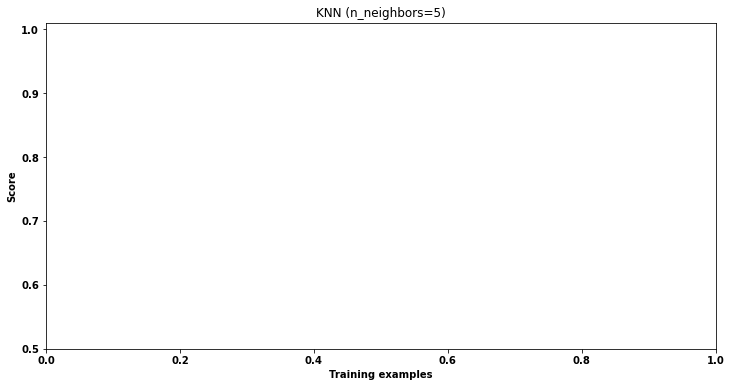

In [54]:
#18.8.2
def plot_knn_learning_curve(knn, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        knn, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='f1_weighted')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt
title1 = "KNN (n_neighbors=5)"
title5 = "KNN (n_neighbors=6)"
title100 = "KNN (n_neighbors=100)"
plot_knn_learning_curve(knn1, title1, X_train, y_train, ylim=(0.5, 1.01), cv=5, n_jobs=-1)
plot_knn_learning_curve(knn2, title5, X_train, y_train, ylim=(0.5, 1.01), cv=5, n_jobs=-1)
plot_knn_learning_curve(knn3, title100, X_train, y_train, ylim=(0.5, 1.01), cv=5, n_jobs=-1)

---

### **`Ejercicio 18.9`**

Ahora probamos la creación de otros modelo basados en **Redes Neuronales**:  

**`18.9.1`** Entrena un modelo tipo **MLPClassifier** y calcula las métricas correspondientes para analizar su rendimiento en comparación con los modelos anteriores:
- `random_state=100`


**`18.9.2`** Entrena otro modelo tipo _MLPClassifier_ indicando los siguientes hiperparámetros y calcula las métricas correspondientes para analizar su rendimiento en comparación con los modelos anteriores:
- `random_state=100`
- `hidden_layer_sizes=(100,200,100)`
- Número máximo de iteraciones igual a `10000`
- `alpha=1e-5`
- `tol=1e-5`

**`18.9.3`** Construye con la misma estructura del modelo definido en el paso anterior, una red neuronal profunda (**DNN**-Deep Neural Networks) usando la librería _keras_  realizando las preparaciones y tratamientos necesarias al respecto y considerando los siguientes parámetros. Después, calcula las métricas correspondientes para analizar su rendimiento en comparación con los modelos anteriores:
- `semilla = 883`
- `epochs = 50`
- `batch_size=100`
- `loss='binary_crossentropy`
- `optimizer='Adam'`
- `umbral = 0.5`
- Accuracy
- F1-score `(average='weighted')`
- Classification report `(zero_division=0)`

**`18.9.4`** Crea otra red neuronal profunda usando _keras_ y considerando los siguientes parámetros. Después, calcula las métricas correspondientes para analizar su rendimiento en comparación con los modelos anteriores:
- Definir las capas ocultas: 
   - Una capa densa con **50** neuronas y la misma función de activación que la red anterior
   - Una capa densa con **100** neuronas y la misma función de activación que la red anterior
   - Una capa densa con **200** neuronas y la misma función de activación que la red anterior
   - Una capa densa con **1000** neuronas y la misma función de activación que la red anterior
   - Una capa densa con **200** neuronas y la misma función de activación que la red anterior
   - Una capa densa con **100** neuronas y la misma función de activación que la red anterior
   - Una capa densa con **50** neuronas y la misma función de activación que la red anterior
      
- `semilla = 883`
- `epochs = 40`
- `batch_size=100`
- `loss='binary_crossentropy`
- `optimizer='Adam'`
- `umbral = 0.5`
- Accuracy
- F1-score `(average='weighted')`
- Classification report `(zero_division=0)`

**`18.9.5`** Saca la gráfica del *Learning Curve* para este último modelo y explica si tiene preferencia o no, comparando con modelos anteriores.
- `semilla = 883`
- `epochs = 40`
- `batch_size=8000`
- `loss='binary_crossentropy`
- `optimizer='Adam'`
- `umbral = 0.5`
- Accuracy
- F1-score `(average='weighted')`
- Classification report `(zero_division=0)`
- (*Sugerencia*: No incluya más de **5** puntos en el eje horizontal y empieza la gráfica con un mínimo de _1000_ muestras para el modelo)

In [56]:
#18.9.1
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=1000, random_state=100)
mlp.fit(X_train_scaled, y_train)

# predict on test set
y_pred = mlp.predict(X_test_scaled)

# evaluate performance
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
report = classification_report(y_test, y_pred, zero_division=0)

In [57]:
report

'              precision    recall  f1-score   support\n\n           0       0.81      0.78      0.80      7381\n           1       0.81      0.86      0.83      9615\n           2       0.79      0.79      0.79      1236\n           3       0.66      0.78      0.71       114\n           4       0.79      0.14      0.24       349\n           5       0.58      0.60      0.59       616\n           6       0.82      0.81      0.81       689\n\n    accuracy                           0.80     20000\n   macro avg       0.75      0.68      0.68     20000\nweighted avg       0.80      0.80      0.80     20000\n'

In [59]:
#18.9.2
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(100, 200, 100), max_iter=10000, alpha=1e-5, tol=1e-5, random_state=100)

mlp.fit(X_train_scaled, y_train)

y_pred = mlp.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred, zero_division=0))

Accuracy: 0.87835
F1-Score: 0.8784120358033961
              precision    recall  f1-score   support

           0       0.87      0.90      0.88      7381
           1       0.91      0.88      0.89      9615
           2       0.84      0.86      0.85      1236
           3       0.67      0.83      0.74       114
           4       0.78      0.69      0.73       349
           5       0.74      0.74      0.74       616
           6       0.91      0.88      0.89       689

    accuracy                           0.88     20000
   macro avg       0.82      0.83      0.82     20000
weighted avg       0.88      0.88      0.88     20000



In [60]:
#18.9.3
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Definir la arquitectura de la red neuronal profunda
modelo = Sequential()
modelo.add(Dense(128, input_dim=8, activation='relu'))
modelo.add(Dropout(0.2))
modelo.add(Dense(64, activation='relu'))
modelo.add(Dropout(0.2))
modelo.add(Dense(32, activation='relu'))
modelo.add(Dense(1, activation='sigmoid'))

# Compilar el modelo
modelo.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar el modelo
modelo.fit(X_train_scaled, y_train, epochs=50, batch_size=100, verbose=0)

# Realizar las predicciones
y_pred = modelo.predict(X_test_scaled)
y_pred = (y_pred > 0.5)

# Calcular las métricas
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
report = classification_report(y_test, y_pred, zero_division=0)

# Imprimir las métricas
print('Accuracy:', acc)
print('F1-score:', f1)
print('Classification report:\n', report)

2023-04-15 20:20:01.337947: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-15 20:20:09.524323: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


ValueError: in user code:

    File "/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1023, in train_step
        y_pred = self(x, training=True)
    File "/opt/anaconda3/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/opt/anaconda3/lib/python3.9/site-packages/keras/engine/input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 8), found shape=(100, 27)


In [61]:
#18.9.4
def create_deep_nn(input_dim):
    model = Sequential()
    model.add(Dense(50, input_dim=input_dim, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(200, activation='relu'))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(200, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
    return model
# Crear el modelo
modelo_dnn = create_deep_nn(X_train_scaled.shape[1])

# Entrenar el modelo
history_dnn = modelo_dnn.fit(X_train_scaled, y_train, epochs=40, batch_size=100, verbose=0, validation_data=(X_test_scaled, y_test))

# Predecir con el modelo
y_pred_dnn = modelo_dnn.predict(X_test)
y_pred_dnn = (y_pred_dnn > 0.5).astype(int)

# Calcular las métricas
acc_dnn = accuracy_score(y_test, y_pred_dnn)
f1_dnn = f1_score(y_test, y_pred_dnn, average='weighted', zero_division=0)
clas_rep_dnn = classification_report(y_test, y_pred_dnn, zero_division=0)


625/625 [==============================] - 1s 2ms/step


In [62]:
#18.9.5
import keras
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
def create_model():
    model = keras.Sequential([
        keras.layers.Dense(50, input_dim=X_train.shape[1], activation='relu'),
        keras.layers.Dense(100, activation='relu'),
        keras.layers.Dense(200, activation='relu'),
        keras.layers.Dense(1000, activation='relu'),
        keras.layers.Dense(200, activation='relu'),
        keras.layers.Dense(100, activation='relu'),
        keras.layers.Dense(50, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
from sklearn.model_selection import learning_curve

model = keras.wrappers.scikit_learn.KerasClassifier(build_fn=create_model, epochs=40, batch_size=8000, verbose=0)
train_sizes, train_scores, test_scores = learning_curve(model, X_train_scaled, y_train, cv=5, train_sizes=[1000, 5000, 10000, 15000, 20000])
import matplotlib.pyplot as plt

plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Accuracy")
plt.ylim(0.5, 1.01)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best")
plt.show()

AttributeError: module 'keras' has no attribute 'wrappers'